# Algoritmi de Clustering  

Am ales să studiez acești patru algoritmi de clustering:  
1. **K-Means** (Clustering Partițional)  
2. **Clustering Ierarhic** (Clustering Aglomerativ)  
3. **DBSCAN** (Clustering Bazat pe Densitate)  
4. **EM (Expectation Maximization)** (Clustering Bazat pe Modele Probabilistice)  

În aceasta lucrare de laborator voi aplica acești algoritmi pe **Evolution of Humans Dataset**

## Importarea Librariilor

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score

import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Incarcarea setului de date

In [215]:
data = pd.read_csv(r"C:\Users\filth\Desktop\an3sem2\ia\lab3\Evolution_DataSets.csv")
data.head()

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

In [219]:
data = data.drop(columns=['Genus_&_Specie', 'Time']) 

Am eliminat coloana Genus & Species, deoarece aceasta reprezenta direct clusterele pe care modelul trebuie să le determine singur. De asemenea, am eliminat coloana Time, care nu este relevantă.

In [222]:
print(data.isnull().sum())

Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64


In [224]:
data = data.dropna()

Apoi am transformat variabilele categorice în valori numerice folosind Label Encoding

In [227]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    'Location', 'Zone', 'Current_Country', 'Habitat',
    'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism',
    'Foramen_Mágnum_Position', 'Canine Size', 'Canines_Shape', 'Tooth_Enamel',
    'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism',
    'Hip', 'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'
]

encoding_mappings = {}

for col in categorical_columns:
    if col in data.columns:
        data[col + '_encoded'] = label_encoder.fit_transform(data[col])
        encoding_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

data = data.drop(columns=categorical_columns)

In [152]:
for col, mapping in encoding_mappings.items():
    print(f"Encoding for {col}:")
    print(mapping)
    print()

Encoding for Location:
{'Africa': 0, 'Asia ': 1, 'Europa': 2}

Encoding for Zone:
{'central': 0, 'oriental': 1, 'south': 2, 'west': 3}

Encoding for Current_Country:
{'Ethiopia': 0, 'Georgia': 1, 'Germany': 2, 'Indonesia': 3, 'Kenya': 4, 'Republic of Chad': 5, 'South Africa': 6, 'Spain': 7}

Encoding for Habitat:
{'cold forest': 0, 'forest': 1, 'forest-gallery': 2, 'forest-savanna': 3, 'jungle': 4, 'mixed': 5, 'peninsular': 6, 'savannah': 7}

Encoding for Incisor_Size:
{'big': 0, 'medium large': 1, 'megadony': 2, 'small': 3, 'very small': 4}

Encoding for Jaw_Shape:
{'U shape': 0, 'V shape': 1, 'conical': 2, 'modern': 3}

Encoding for Torus_Supraorbital:
{'flat': 0, 'less protruding': 1, 'little protruding': 2, 'ultra protruding': 3, 'very protruding': 4}

Encoding for Prognathism:
{'absent': 0, 'high': 1, 'medium': 2, 'medium-high': 3, 'reduced': 4, 'very high': 5}

Encoding for Foramen_Mágnum_Position:
{'anterior': 0, 'modern': 1, 'posterior': 2, 'semi-anterior': 3}

Encoding for Can

In [155]:
features = [
    'Cranial_Capacity', 'Height',
    'Location_encoded', 'Zone_encoded', 'Current_Country_encoded', 'Habitat_encoded',
    'Incisor_Size_encoded', 'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
    'Prognathism_encoded', 'Foramen_Mágnum_Position_encoded', 'Canine Size_encoded',
    'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded', 'Tecno_type_encoded',
    'biped_encoded', 'Arms_encoded', 'Foots_encoded', 'Diet_encoded', 'Sexual_Dimorphism_encoded',
    'Hip_encoded', 'Vertical_Front_encoded', 'Anatomy_encoded', 'Migrated_encoded',
    'Skeleton_encoded'
]

# Standardizare
scaler = StandardScaler()
processed_data = scaler.fit_transform(data[features])

## Alegerea numarului de clustere

Ulterior am folosit scorului Silhouette pentru a alege nr de clustere. Scorului Silhouette măsoară cât de bine se potrivesc punctele într-un cluster față de cele din alte clustere,cu cat el este mai mare indică o separare mai bună între clustere. 
Am ales 24 de clustere, deoarece am observat că scorul Silhouette a fost maxim pentru n_clusters = 24 (scor de 0.8752).


In [197]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(processed_data)
    silhouette_avg = silhouette_score(processed_data, cluster_labels)
    print(f"n_clusters = {k},  silhouette score: {silhouette_avg}")

n_clusters = 2,  silhouette score: 0.3169417510252942
n_clusters = 3,  silhouette score: 0.2035967403648882
n_clusters = 4,  silhouette score: 0.2655548197311985
n_clusters = 5,  silhouette score: 0.27287681206385134
n_clusters = 6,  silhouette score: 0.3124010636444998
n_clusters = 7,  silhouette score: 0.40432134171973894
n_clusters = 8,  silhouette score: 0.4584190784192779
n_clusters = 9,  silhouette score: 0.5115148707174668
n_clusters = 10,  silhouette score: 0.5214298113437834
n_clusters = 11,  silhouette score: 0.5425044677054054
n_clusters = 12,  silhouette score: 0.5679742345171999
n_clusters = 13,  silhouette score: 0.6001628742801114
n_clusters = 14,  silhouette score: 0.6369353633292769
n_clusters = 15,  silhouette score: 0.6791027947096405
n_clusters = 16,  silhouette score: 0.7118752022620068
n_clusters = 17,  silhouette score: 0.7404361481957558
n_clusters = 18,  silhouette score: 0.7782103323857277
n_clusters = 19,  silhouette score: 0.8095847905276549
n_clusters = 20,

# K-Means Clustering

## K-Means este un algoritm de clustering partițional care grupează datele în **k** clustere, minimizând varianța internă a fiecărui cluster.

K-Means este un algoritm de învățare nesupervizată folosit pentru a împărți un set de date în grupuri (clustere). Algoritmul funcționează astfel:

1. **Inițializare:** Alegi un număr **k** de clustere.
2. **Atribuirea inițială:** Se aleg **k** puncte de date (numite „centroizi”) ca puncte de început pentru fiecare cluster.
3. **Atribuirea punctelor la clustere:** Fiecare punct de date este atribuit clusterului al cărui centru este cel mai apropiat.
4. **Actualizarea centroizilor:** După ce punctele au fost atribuite clusterelelor lor, se calculează centrul fiecărui cluster (media tuturor punctelor din acel cluster).
5. **Repetarea procesului:** Se repetă pașii 3 și 4 până când centroizii nu se mai schimbă semnificativ, ceea ce înseamnă că algoritmul a convergent.

În acest caz, am ales **24 de clustere** pentru a grupa datele.

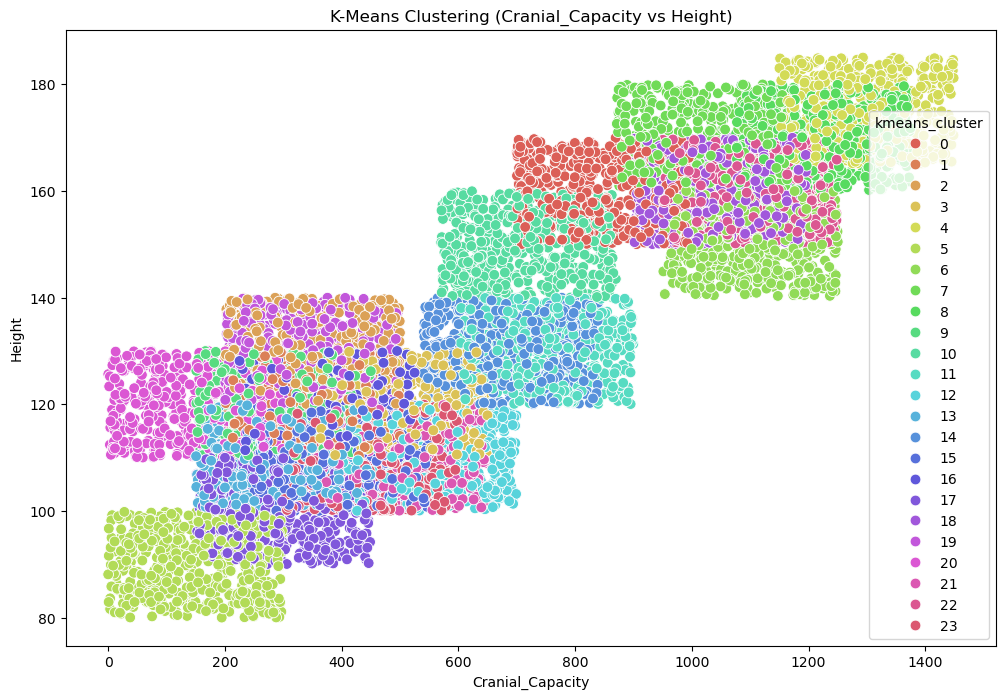

Silhouette Score: 0.8752244352362569


In [157]:
kmeans = KMeans(n_clusters=24, random_state=42)
kmeans_labels = kmeans.fit_predict(processed_data)

data['kmeans_cluster'] = kmeans_labels

plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Cranial_Capacity'], y=data['Height'], hue=data['kmeans_cluster'], 
                palette=sns.color_palette('hls', 24), s=60)
plt.title('K-Means Clustering (Cranial_Capacity vs Height)')
plt.xlabel('Cranial_Capacity')
plt.ylabel('Height')
plt.show()

silhouette_avg = silhouette_score(processed_data, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")

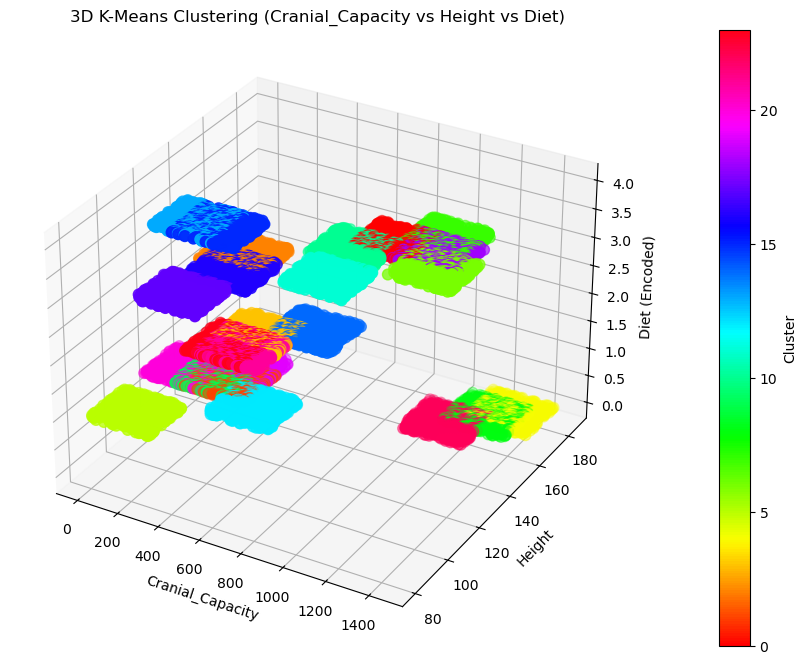

In [160]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    data['Cranial_Capacity'],  
    data['Height'],            
    data['Diet_encoded'],     
    c=data['kmeans_cluster'],  
    cmap='hsv',                
    s=60                     
)

ax.set_xlabel('Cranial_Capacity')
ax.set_ylabel('Height')
ax.set_zlabel('Diet (Encoded)')
plt.title('3D K-Means Clustering (Cranial_Capacity vs Height vs Diet)')

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

plt.show()

# Analiza de Clustering a Speciilor de Hominini

Această analiză de clustering a fost realizată pentru a grupa diferitele specii de hominini pe baza trăsăturilor lor morfologice și comportamentale. Modelul de clustering utilizat a fost K-Means cu 24 de clustere, fiecare corespunzând unei specii cunoscute de hominin.

## Interpretarea Clusterelelor
Fiecare cluster reprezintă o specie diferită din setul de date, ceea ce înseamnă că modelul de clustering a identificat cu succes grupuri evoluționare distincte. Numele speciilor și etichetele corespunzătoare ale clusterelor sunt:

| Cluster | Numele Speciei               |
|---------|------------------------------|
| 0       | Australopithecus Afarensis    |
| 1       | Australopithecus Africanus    |
| 2       | Australopithecus Anamensis    |
| 3       | Australopithecus Bahrelghazali|
| 4       | Australopithecus Garhi        |
| 5       | Australopithecus Sediba       |
| 6       | Homo Antecesor                |
| 7       | Homo Erectus                  |
| 8       | Homo Ergaster                 |
| 9       | Homo Floresiensis             |
| 10      | Homo Georgicus                |
| 11      | Homo Habilis                  |
| 12      | Homo Heidelbergensis          |
| 13      | Homo Naledi                   |
| 14      | Homo Neanderthalensis         |
| 15      | Homo Rodhesiensis             |
| 16      | Homo Rudolfensis              |
| 17      | Homo Sapiens                  |
| 18      | Paranthropus Aethiopicus      |
| 19      | Paranthropus Boisei           |
| 20      | Paranthropus Robustus         |
| 21      | Ardipithecus Ramidus / Kabadda|
| 22      | Orrorin Tugenencin            |
| 23      | Sahelanthropus Tchadensis     |

Acest clustering confirmă că trăsăturile setului de date se aliniază bine cu clasificarea speciilor. Fiecare cluster corespunde în mod natural unei specii, demonstrând că trăsăturile selectate captează real diferențele dintre grupurile de hominizi.

# Clustering Ierarhic (Aglomerativ)

## Clusteringul aglomerativ este un algoritm de clustering ierarhic care construiește clustere în mod succesiv, prin fuzionarea sau împărțirea acestora.

Acesta începe cu fiecare punct de date ca un cluster propriu și apoi combină succesiv cele mai apropiate clustere. Procesul se desfășoară în următoarele etape:

1. **Inițializare:** Fiecare punct de date este considerat un cluster individual.
2. **Calcularea distanțelor:** Se calculează distanțele între toate clusterele. De obicei, distanța dintre două clustere este determinată pe baza distanței medii dintre ele (în cazul opțiunii **linkage='average'**).
3. **Fuzionarea clusterelelor:** Cele mai apropiate două clustere sunt fuzionate într-un singur cluster.
4. **Repetarea procesului:** Acest proces de fuzionare este repetat până când se ajunge la un număr dorit de clustere.

În cazul de față, am ales **24 de clustere** și am utilizat metoda **'average linkage'** pentru a calcula distanțele între clustere, care combină clusterele în funcție de distanța medie dintre punctele lor.

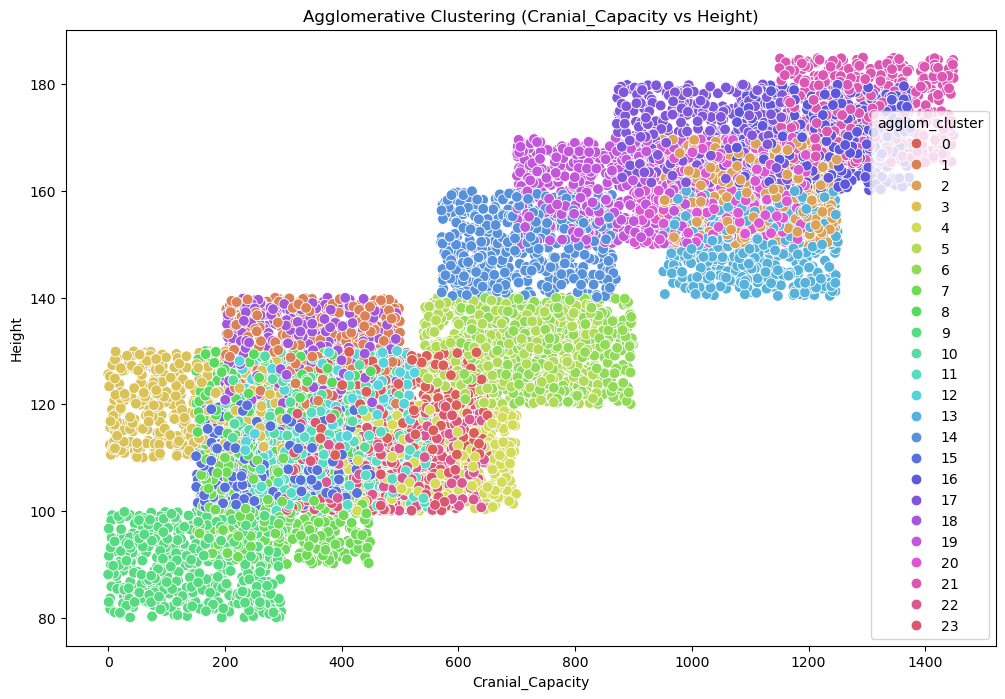

In [183]:
agglom = AgglomerativeClustering(n_clusters=24, linkage='average').fit(processed_data)

data['agglom_cluster'] = agglom.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Cranial_Capacity'], y=data['Height'], hue=data['agglom_cluster'], 
                palette=sns.color_palette('hls', 24), s=60)
plt.title('Agglomerative Clustering (Cranial_Capacity vs Height)')
plt.xlabel('Cranial_Capacity')
plt.ylabel('Height')
plt.show()


O **dendrogramă** este un tip de diagramă care vizualizează structura ierarhică a unui set de date. Este utilizată pentru a reprezenta rezultatele unui algoritm de **clustering ierarhic**, arătând modul în care elementele sunt grupate succesiv pe măsură ce sunt fuzionate în clustere mai mari. Fiecare ramură a dendogramei reprezintă o fuzionare a două clustere, iar înălțimea ramurii indică distanța la care a avut loc fuzionarea. Cu cât înălțimea este mai mare, cu atât clusterele sunt mai diferite unul de celălală clusterele ierarhic.

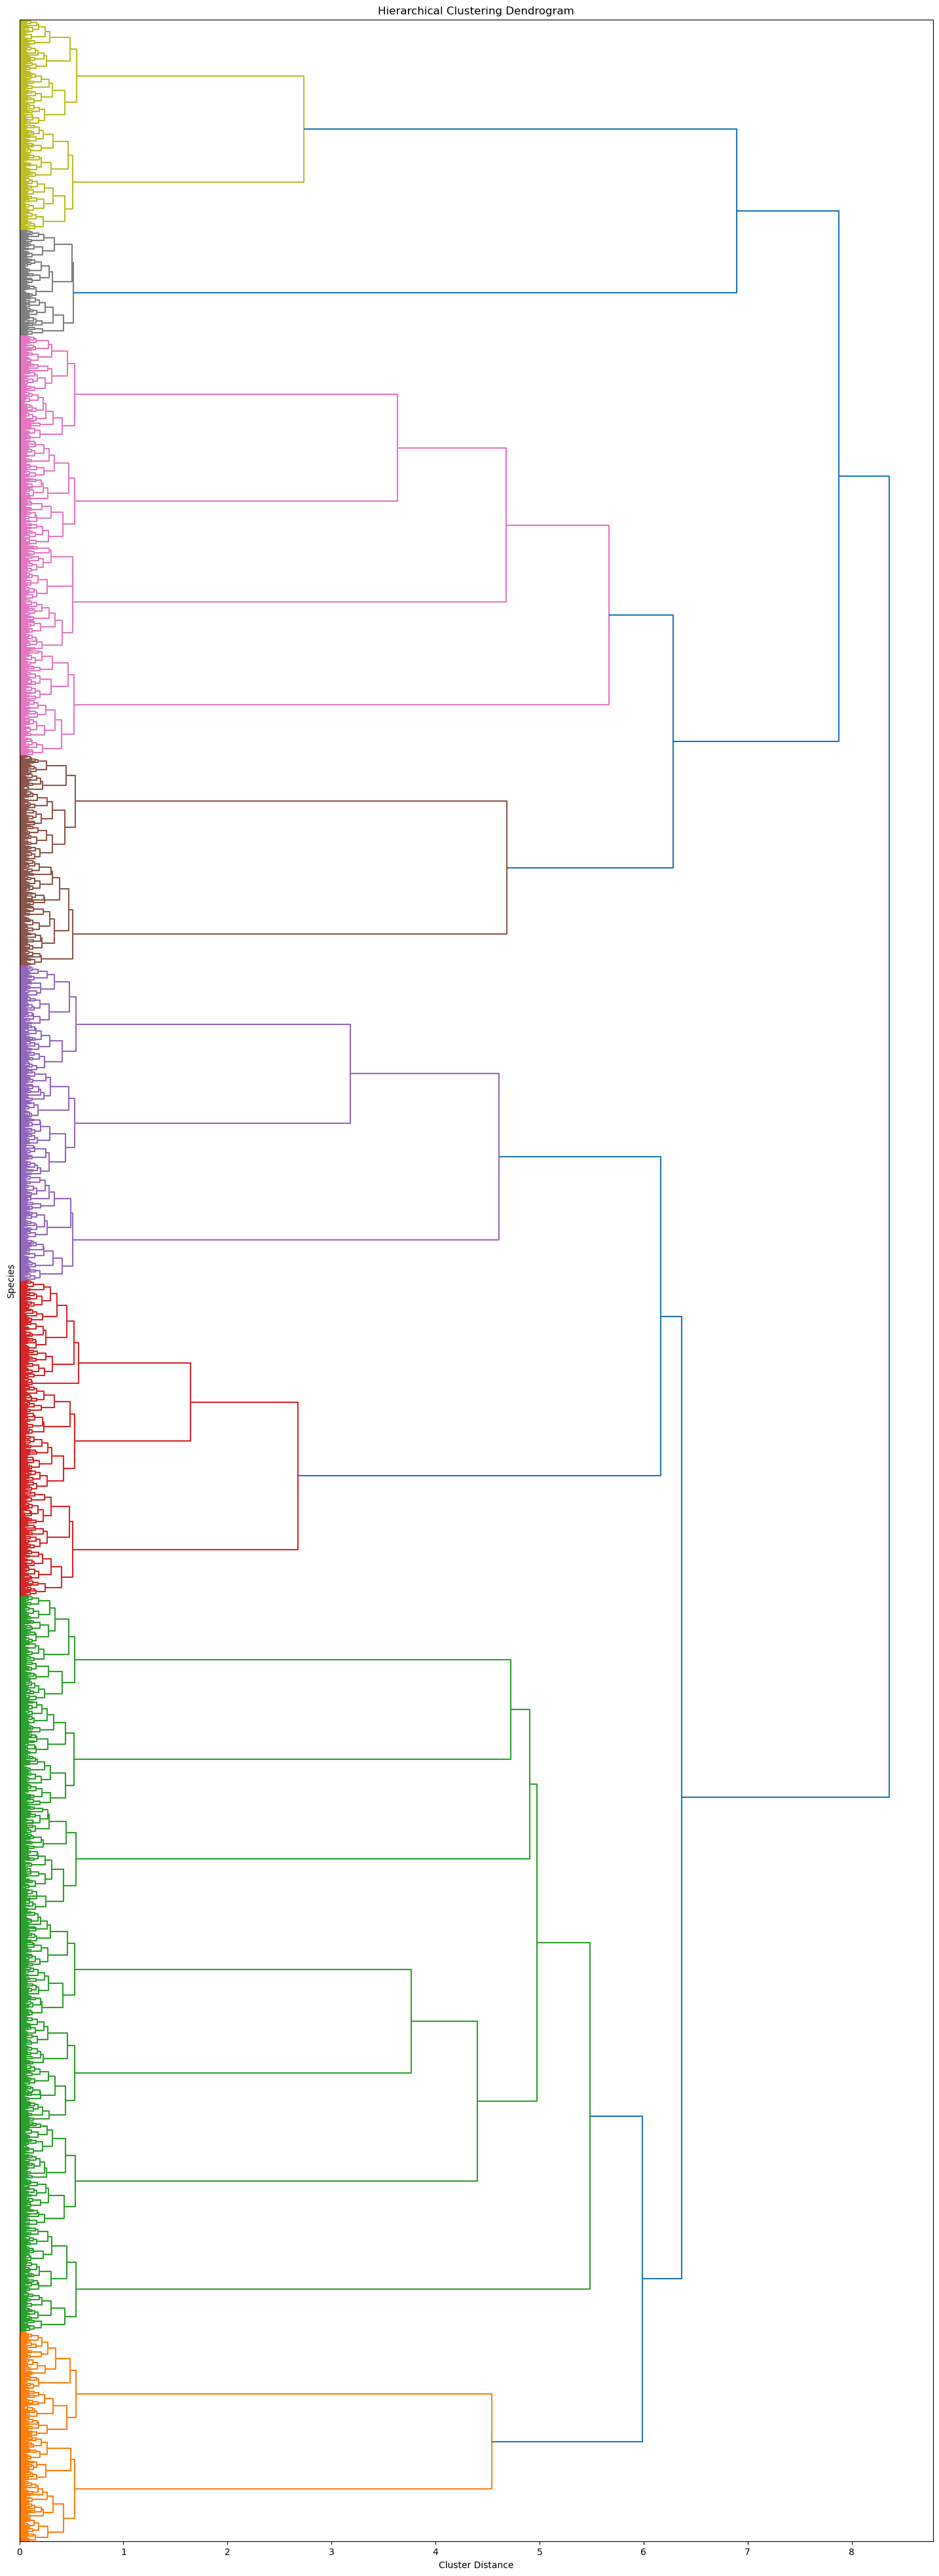

In [188]:
import scipy.cluster.hierarchy as hierarchy

Z = hierarchy.linkage(processed_data, method='average')

plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right', no_labels=True)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Distance")
plt.ylabel("Species")
plt.show()


# DBSCAN (Clustering bazat pe densitate)

## DBSCAN este un algoritm de clustering bazat pe densitate care grupează punctele care sunt apropiate unele de altele, marcând punctele din regiunile de densitate scăzută ca fiind outlieri.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) este un algoritm de clustering care se bazează pe densitatea punctelor într-un spațiu de date. Principalele idei ale acestui algoritm sunt:

1. **Puncte de nucleu:** Dacă un punct are suficienți vecini apropiați (determinati printr-un parametru de distanță **epsilon** și un număr minim de puncte **minPts**), este considerat un "punct de nucleu" și este folosit pentru a forma un cluster.
   
2. **Extinderea clusterelor:** Algoritmul adaugă puncte vecine unui cluster dacă sunt apropiate de un punct de nucleu. Aceasta continuă până când nu mai există puncte de adăugat.
   
3. **Outlieri:** Punctele care nu pot fi adăugate la niciun cluster, adică cele care se află în regiuni cu densitate scăzută, sunt considerate **outlieri**.

DBSCAN este util pentru detectarea clusterelelor de forme neregulate și poate identifica outlieri, spre deosebire de alți algoritmi care presupun clustere sferice (precum K-Means).

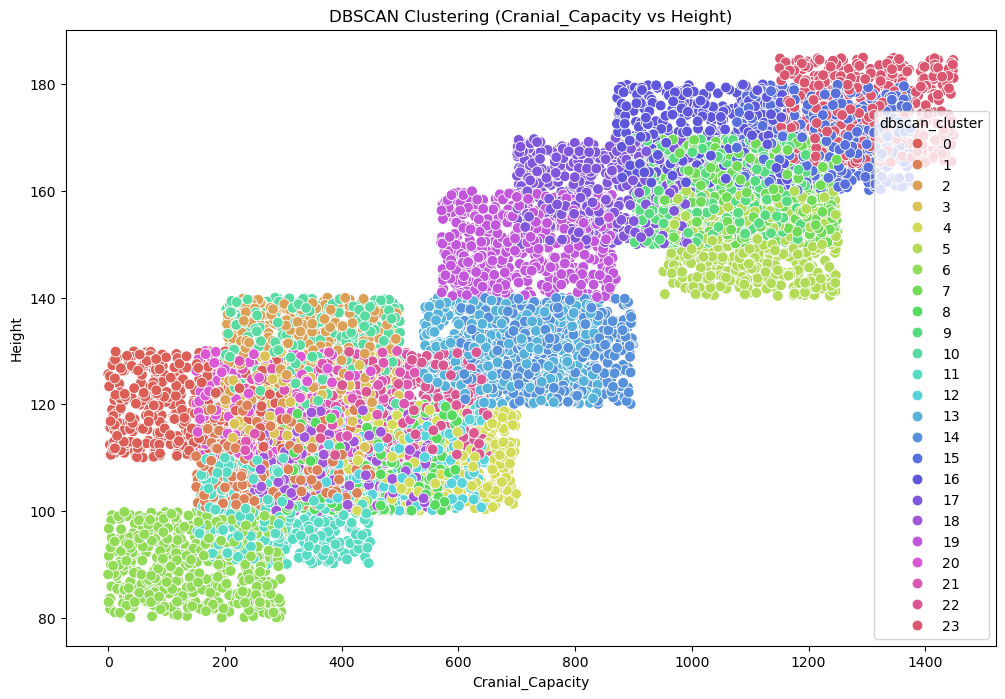

Silhouette Score: 0.8752244352362569


In [66]:
db = DBSCAN(eps=0.5, min_samples=5).fit(processed_data)

data['dbscan_cluster'] = db.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Cranial_Capacity'], y=data['Height'], hue=data['dbscan_cluster'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), s=60)
plt.title('DBSCAN Clustering (Cranial_Capacity vs Height)')
plt.xlabel('Cranial_Capacity')
plt.ylabel('Height')
plt.show()


# Clustering prin Expectation Maximization (EM)

## EM este un algoritm de clustering bazat pe un model probabilistic care presupune că datele sunt generate dintr-o amestec de distribuții Gaussiene.

Algoritmul **Expectation Maximization (EM)** este folosit pentru a găsi parametrii unui model de distribuție probabilistică care poate descrie datele. În contextul clusteringului, EM presupune că datele provin dintr-un **amestec de distribuții Gaussiene** și încearcă să estimeze distribuțiile care stau la baza datelor.

Algoritmul funcționează în două etape iteratve:

1. **Pasul de Expectation (E):** Se calculează probabilitatea ca fiecare punct de date să aparțină unui cluster, pe baza parametrilor curenți ai modelului (media și varianta pentru fiecare distribuție Gaussiană).
   
2. **Pasul de Maximization (M):** Se actualizează parametrii modelului (media și varianta distribuțiilor Gaussiene) pentru a maximiza probabilitatea datelor, ținând cont de probabilitățile calculate în pasul anterior.

EM este folosit pentru a modela clusterele care sunt distribuite conform unor forme de curbe (distribuții Gaussiene), și este eficient în a găsi clustere în seturi de date care au o structură probabilistică complexă.

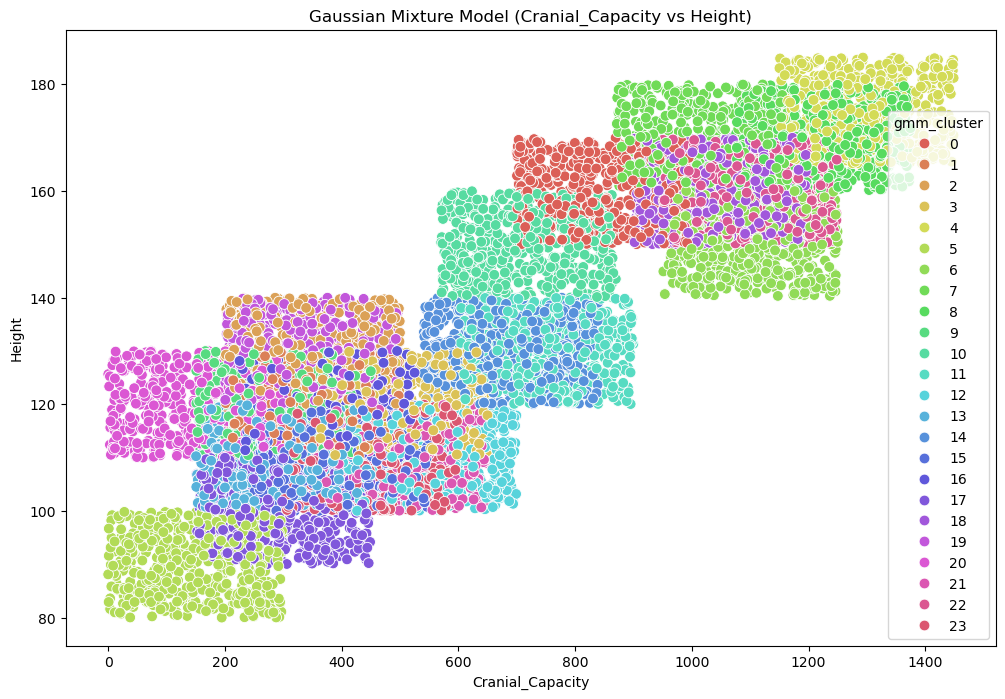

Silhouette Score: 0.8752244352362569


In [68]:
gmm = GaussianMixture(n_components=24, random_state=42).fit(processed_data)
gmm_labels = gmm.predict(processed_data)

data['gmm_cluster'] = gmm_labels

plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Cranial_Capacity'], y=data['Height'], hue=data['gmm_cluster'], 
                palette=sns.color_palette('hls', 24), s=60)
plt.title('Gaussian Mixture Model (Cranial_Capacity vs Height)')
plt.xlabel('Cranial_Capacity')
plt.ylabel('Height')
plt.show()


<h2 style="text-align: center;">Concluzii</h2>

<p style="text-indent: 30px; font-size: 20px;">În urma aplicării celor patru algoritmi de clustering – <strong>K-Means</strong>, <strong>Clustering Ierarhic</strong>, <strong>DBSCAN</strong> și <strong>Expectation Maximization (EM)</strong> – am obținut o înțelegere profundă a modului în care datele pot fi structurate în grupuri distincte, în funcție de tehnica aleasă. Algoritmul <strong>K-Means</strong> a reușit să identifice 24 de clustere cu un <strong>silhouette score</strong> ridicat, demonstrând că datele sunt bine grupate și structurate. <strong>Clusteringul Ierarhic</strong> a oferit o vizualizare clară a relațiilor dintre specii prin dendrogramă, facilitând observarea ierarhiei naturale dintre ele. În schimb, <strong>DBSCAN</strong> a excelat în detectarea clusterelelor de densitate, identificând corect outlierii din regiunile de densitate scăzută. Algoritmul <strong>EM</strong> a fost util pentru modelarea datelor prin amestecuri de distribuții Gaussiene, având o abordare probabilistică eficientă. Astfel, am învățat că alegerea algoritmului potrivit depinde de structura datelor: <strong>K-Means</strong> este ideal pentru clusterele sferice, <strong>Clusteringul Ierarhic</strong> pentru structuri ierarhice, <strong>DBSCAN</strong> pentru forme neregulate, iar <strong>EM</strong> pentru datele ce urmează o distribuție probabilistică. Fiecare dintre aceste metode a adus o perspectivă unică asupra setului de date, demonstrând eficiența lor în contextul specific al analizei.</p> 
